In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
print(torch.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

1.8.1+cu101


In [4]:
GDRIVE = '/content/drive/MyDrive/2516'

In [5]:
models = [
          'RDN_50epoch_Baseline_Bicubic',
          'RDN_50epoch_AblateCMLRLGFF_Bicubic',
          'RDN_50epoch_AblateLRLGFF_Bicubic',
          'RDN_50epoch_AblateCMGFF_Bicubic',
          'RDN_50epoch_AblateCMLRL_Bicubic',
          'RDN_50epoch_AblateGFF_Bicubic',
          'RDN_50epoch_AblateLRL_Bicubic',
          'RDN_50epoch_AblateCM_Bicubic',
          'RDN_50epoch_ShortSkipConn_Bicubic',
          'RDN_50epoch_Laplacian_Bicubic',
          'RDN_50epoch_ResidualBlock_Bicubic',
          'RDN_50epoch_CascadingBlock_Bicubic',
          'RDN_50epoch_BaselineD16C8G64_Bicubic',
          'RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic',
          'DRLN_50epoch_Baseline_Model',
          'DRLN_50epoch_No_Everything_Model',
          'DRLN_50epoch_No-Laplacian_Model',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model',
          'DRLN_50epoch_No_Long_Skip_Conn_Model',
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model',
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model',
          'DRLN_50epoch_no_medium_skip_conn_Model',
         ]

# Download Models - Deprecated

In [5]:
for model in models:
  print(model)
  !cp {GDRIVE}/{model}.zip /content/
  !unzip -q {model}.zip

RDN_50epoch_Baseline_Bicubic
RDN_50epoch_AblateCMLRLGFF_Bicubic
RDN_50epoch_AblateLRLGFF_Bicubic
RDN_50epoch_AblateCMGFF_Bicubic
RDN_50epoch_AblateCMLRL_Bicubic
RDN_50epoch_AblateGFF_Bicubic
RDN_50epoch_AblateLRL_Bicubic
RDN_50epoch_AblateCM_Bicubic
RDN_50epoch_ShortSkipConn_Bicubic
RDN_50epoch_Laplacian_Bicubic
RDN_50epoch_ResidualBlock_Bicubic
RDN_50epoch_CascadingBlock_Bicubic
RDN_50epoch_BaselineD16C8G64_Bicubic
RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic
cp: cannot stat '/content/drive/MyDrive/2516/RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic.zip': No such file or directory
unzip:  cannot find or open RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic.zip, RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic.zip.zip or RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic.zip.ZIP.
DRLN_50epoch_Baseline_Model
DRLN_50epoch_No_Everything_Model
DRLN_50epoch_No-Laplacian_Model
DRLN_50epoch_No-LONG-No-Laplacian_Model
DRLN_50epoch_No_Long_Skip_Conn_Model
DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model
DRLN_50epoch_NO-Medi

# Process DRLN Zips - Deprecated

In [6]:
weird_models = [
          'DRLN_50epoch_No_Everything_Model',
          'DRLN_50epoch_No-Laplacian_Model',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model',
          'DRLN_50epoch_No_Long_Skip_Conn_Model',
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model',
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model',
          'DRLN_50epoch_no_medium_skip_conn_Model']
drln_models = [
          'DRLN_50epoch_Baseline_Model',
          'DRLN_50epoch_No_Everything_Model',
          'DRLN_50epoch_No-Laplacian_Model',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model',
          'DRLN_50epoch_No_Long_Skip_Conn_Model',
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model',
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model',
          'DRLN_50epoch_no_medium_skip_conn_Model',  
]

In [7]:
for model in weird_models:
  !mkdir /content/{model}
  !mv /content/content/{model}/* /content/{model}
!rm -rf /content/content

In [8]:
for model in drln_models:
  !mv /content/{model}/DRLN_epoch50/* /content/{model}

# Extract logs from model.zips
Just need to load `model_logs.zip` next time for plots

In [9]:
mkdir /content/model_logs

In [10]:
to_cps = ['log.txt', 'loss.pt', 'loss_L1.png', 'loss_log.pt', 'psnr_log.pt', 'test_DIV2K.png']
for model in models:
  !mkdir /content/model_logs/{model}
  for to_cp in to_cps:
    !cp /content/{model}/{to_cp} /content/model_logs/{model}/{to_cp}

cp: cannot stat '/content/RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic/log.txt': No such file or directory
cp: cannot stat '/content/RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic/loss.pt': No such file or directory
cp: cannot stat '/content/RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic/loss_L1.png': No such file or directory
cp: cannot stat '/content/RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic/loss_log.pt': No such file or directory
cp: cannot stat '/content/RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic/psnr_log.pt': No such file or directory
cp: cannot stat '/content/RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic/test_DIV2K.png': No such file or directory


In [11]:
!zip -r model_logs.zip model_logs

  adding: model_logs/ (stored 0%)
  adding: model_logs/DRLN_50epoch_NO-Medium-No-Laplacian_Model/ (stored 0%)
  adding: model_logs/DRLN_50epoch_NO-Medium-No-Laplacian_Model/log.txt (deflated 86%)
  adding: model_logs/DRLN_50epoch_NO-Medium-No-Laplacian_Model/test_DIV2K.png (deflated 6%)
  adding: model_logs/DRLN_50epoch_NO-Medium-No-Laplacian_Model/loss_log.pt (deflated 11%)
  adding: model_logs/DRLN_50epoch_NO-Medium-No-Laplacian_Model/loss_L1.png (deflated 10%)
  adding: model_logs/DRLN_50epoch_NO-Medium-No-Laplacian_Model/loss.pt (deflated 19%)
  adding: model_logs/DRLN_50epoch_NO-Medium-No-Laplacian_Model/psnr_log.pt (deflated 13%)
  adding: model_logs/RDN_50epoch_CascadingBlock_Bicubic/ (stored 0%)
  adding: model_logs/RDN_50epoch_CascadingBlock_Bicubic/log.txt (deflated 87%)
  adding: model_logs/RDN_50epoch_CascadingBlock_Bicubic/test_DIV2K.png (deflated 7%)
  adding: model_logs/RDN_50epoch_CascadingBlock_Bicubic/loss_log.pt (deflated 11%)
  adding: model_logs/RDN_50epoch_Cascadi

In [12]:
!cp model_logs.zip {GDRIVE}

# Load logs

In [6]:
cp {GDRIVE}/model_logs.zip model_logs.zip

In [7]:
!unzip -q model_logs.zip

In [8]:
for model in models:
  !mv model_logs/{model} {model}

# Plot Logs

In [9]:
FILE_EXPNAME = {
          'RDN_50epoch_Baseline_Bicubic': 'RDN Baseline',
          'RDN_50epoch_AblateCMLRLGFF_Bicubic': 'RDN w/o CM,LRL,GFF',
          'RDN_50epoch_AblateLRLGFF_Bicubic':'RDN w/o LRL,GFF',
          'RDN_50epoch_AblateCMGFF_Bicubic':'RDN w/o CM,GFF',
          'RDN_50epoch_AblateCMLRL_Bicubic':'RDN w/o CM,LRL',
          'RDN_50epoch_AblateGFF_Bicubic':'RDN w/o GFF',
          'RDN_50epoch_AblateLRL_Bicubic':'RDN w/o LRL',
          'RDN_50epoch_AblateCM_Bicubic':'RDN w/o CM',
          'RDN_50epoch_ShortSkipConn_Bicubic':'RDN + SSC',
          'RDN_50epoch_Laplacian_Bicubic':'RDN + LA',
          'RDN_50epoch_ResidualBlock_Bicubic':'RDN + Residual Blocks',
          'RDN_50epoch_CascadingBlock_Bicubic':'RDN + Global Cascading',
          'RDN_50epoch_BaselineD16C8G64_Bicubic': 'RDN Baseline D16C8G64',
          'RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic': 'RDN w/o CM,LRL,GFF D16C8G64',
          'DRLN_50epoch_Baseline_Model':'DRLN Baseline',
          'DRLN_50epoch_No_Everything_Model':'DRLN w/o SSC,LSC,LA',
          'DRLN_50epoch_No-Laplacian_Model':'DRLN w/o LA',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model':'DRLN w/o LSC,LA',
          'DRLN_50epoch_No_Long_Skip_Conn_Model':'DRLN w/o LSC',
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model':'DRLN w/o SSC,LSC',
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model':'DRLN w/o SSC,LA',
          'DRLN_50epoch_no_medium_skip_conn_Model':'DRLN w/o SSC',
}

In [10]:
fig_dir = '/content/figures'

In [11]:
mkdir {fig_dir}

In [12]:
baseline_args = {
    'linestyle':'dashed', 
    'color':'r'
}
none_args = {
    'color': None
}

# figsize=(10, 8), dpi=80

def plot_psnr(epoch, model_names, figname):
  logs = []
  for model in model_names:
    log = torch.load(model + '/psnr_log.pt')[:, 0].numpy()
    logs.append(log)

  axis = np.linspace(1, epoch, epoch)
  # label = 'SR on DIV2K'
  fig = plt.figure()
  # plt.title(label)
  for i, log in enumerate(logs):
    color = 'r' if i == 0 else None
    args = baseline_args if i ==0 else none_args

    plt.plot(
        axis,
        log,
        label=FILE_EXPNAME[model_names[i]],
        **args
    )
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('PSNR')
  plt.grid(True)

  plt.savefig('{}/convergence_{}.png'.format(fig_dir, figname))
  plt.show()
  plt.close(fig)

In [30]:
 [
          'RDN_50epoch_Baseline_Bicubic',
          'RDN_50epoch_AblateCMLRLGFF_Bicubic',
          'RDN_50epoch_AblateLRLGFF_Bicubic',
          'RDN_50epoch_AblateCMGFF_Bicubic',
          'RDN_50epoch_AblateCMLRL_Bicubic',
          'RDN_50epoch_AblateGFF_Bicubic',
          'RDN_50epoch_AblateLRL_Bicubic',
          'RDN_50epoch_AblateCM_Bicubic',
          'RDN_50epoch_ShortSkipConn_Bicubic',
          'RDN_50epoch_Laplacian_Bicubic',
          'RDN_50epoch_ResidualBlock_Bicubic',
          'RDN_50epoch_CascadingBlock_Bicubic',
          'RDN_50epoch_BaselineD16C8G64_Bicubic',
          'RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic',
          'DRLN_50epoch_Baseline_Model',
          'DRLN_50epoch_No_Everything_Model',
          'DRLN_50epoch_No-Laplacian_Model',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model',
          'DRLN_50epoch_No_Long_Skip_Conn_Model',
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model',
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model',
          'DRLN_50epoch_no_medium_skip_conn_Model',
         ]


## Start plotting

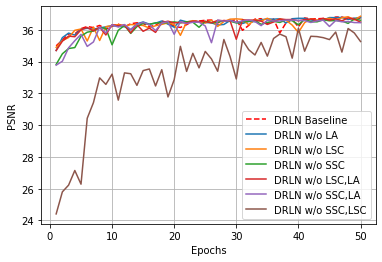

In [16]:
plot_psnr(50, [
'DRLN_50epoch_Baseline_Model',
'DRLN_50epoch_No-Laplacian_Model',
          'DRLN_50epoch_No_Long_Skip_Conn_Model',
          'DRLN_50epoch_no_medium_skip_conn_Model',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model',
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model',
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model',
], 'DRLN_BaselinesAblateComponents')

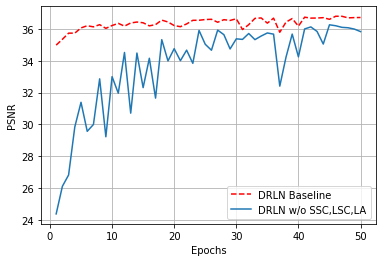

In [17]:
plot_psnr(50, [
'DRLN_50epoch_Baseline_Model',
'DRLN_50epoch_No_Everything_Model',
], 'DRLN_BaselinesAblateAll')

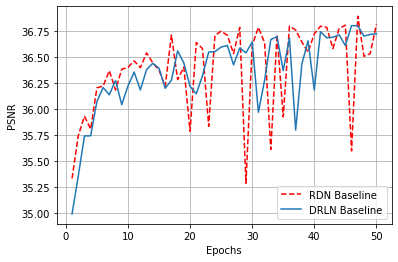

In [18]:
plot_psnr(50, [
'RDN_50epoch_Baseline_Bicubic',
'DRLN_50epoch_Baseline_Model',
], 'RDN_DRLN_Baselines')

In [ ]:
plot_psnr(50, [
'RDN_50epoch_BaselineD16C8G64_Bicubic',
          'RDN_50epoch_AblateCMLRLGFFD16C8G64_Bicubic',
], 'RDN_BaselineAblateAll_ConfigB')

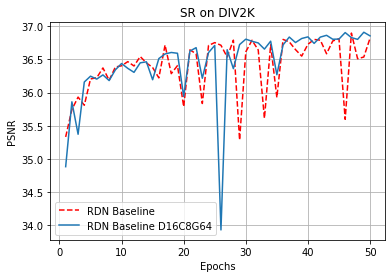

In [31]:
plot_psnr(50, [
'RDN_50epoch_Baseline_Bicubic',
'RDN_50epoch_BaselineD16C8G64_Bicubic',
], 'RDN_BaselineModelSize.png')

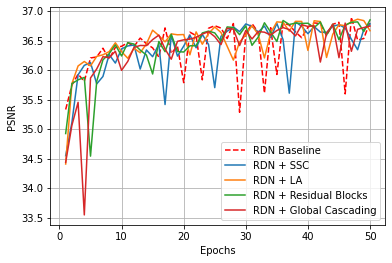

In [20]:
plot_psnr(50, [
'RDN_50epoch_Baseline_Bicubic',
'RDN_50epoch_ShortSkipConn_Bicubic',
          'RDN_50epoch_Laplacian_Bicubic',
          'RDN_50epoch_ResidualBlock_Bicubic',
          'RDN_50epoch_CascadingBlock_Bicubic',
], 'RDN_BaselineAddComponents')

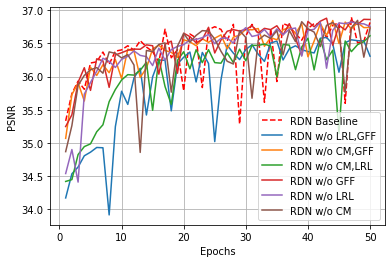

In [21]:
plot_psnr(50, [
'RDN_50epoch_Baseline_Bicubic',
'RDN_50epoch_AblateLRLGFF_Bicubic',
          'RDN_50epoch_AblateCMGFF_Bicubic',
          'RDN_50epoch_AblateCMLRL_Bicubic',
          'RDN_50epoch_AblateGFF_Bicubic',
          'RDN_50epoch_AblateLRL_Bicubic',
          'RDN_50epoch_AblateCM_Bicubic',
], 'RDN_BaselineAblateComponents')

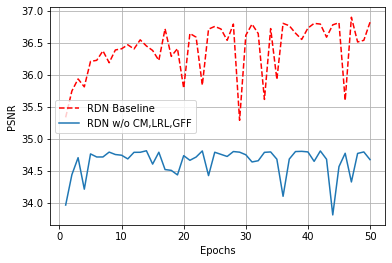

In [22]:
plot_psnr(50, [
'RDN_50epoch_Baseline_Bicubic',
'RDN_50epoch_AblateCMLRLGFF_Bicubic',            
], 'RDN_BaselineAblateAll')

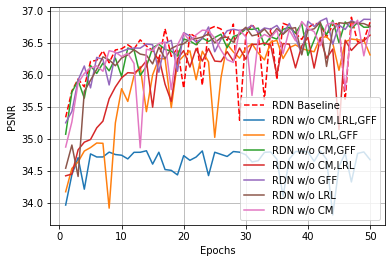

In [23]:
plot_psnr(50, [
'RDN_50epoch_Baseline_Bicubic',
'RDN_50epoch_AblateCMLRLGFF_Bicubic',
'RDN_50epoch_AblateLRLGFF_Bicubic',
          'RDN_50epoch_AblateCMGFF_Bicubic',
          'RDN_50epoch_AblateCMLRL_Bicubic',
          'RDN_50epoch_AblateGFF_Bicubic',
          'RDN_50epoch_AblateLRL_Bicubic',
          'RDN_50epoch_AblateCM_Bicubic',
], 'RDN_BaselineAblateAllandComponents')

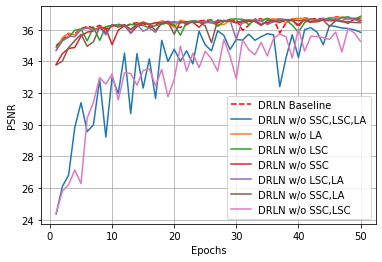

In [24]:
plot_psnr(50, [
'DRLN_50epoch_Baseline_Model',
'DRLN_50epoch_No_Everything_Model',
'DRLN_50epoch_No-Laplacian_Model',
          'DRLN_50epoch_No_Long_Skip_Conn_Model',
          'DRLN_50epoch_no_medium_skip_conn_Model',
          'DRLN_50epoch_No-LONG-No-Laplacian_Model',
          'DRLN_50epoch_NO-Medium-No-Laplacian_Model',
          'DRLN_50epoch_NO-Medium-Con-No-Long-Con_Model',
], 'DRLN_BaselinesAblateAllandComponents')

## Save figures

In [25]:
!zip -r figures.zip figures
!cp figures.zip {GDRIVE}

  adding: figures/ (stored 0%)
  adding: figures/convergence_RDN_DRLN_Baselines.png (deflated 3%)
  adding: figures/convergence_DRLN_BaselinesAblateAll.png (deflated 3%)
  adding: figures/convergence_DRLN_BaselinesAblateAllandComponents.png (deflated 2%)
  adding: figures/convergence_RDN_BaselineAddComponents.png (deflated 2%)
  adding: figures/.ipynb_checkpoints/ (stored 0%)
  adding: figures/convergence_RDN_BaselineAblateAll.png (deflated 3%)
  adding: figures/convergence_DRLN_BaselinesAblateComponents.png (deflated 3%)
  adding: figures/convergence_RDN_BaselineAblateComponents.png (deflated 1%)
  adding: figures/convergence_RDN_BaselineAblateAllandComponents.png (deflated 1%)
